# **UnderStanding Datasets:**

In [2]:
import pandas as pd

# File paths for each data file
ideal_data_file = "/kaggle/input/store-transaction-data/Hackathon_Ideal_Data.csv"
mapping_file = "/kaggle/input/store-transaction-data/Hackathon_Mapping_File.csv"
validation_data_file = "/kaggle/input/store-transaction-data/Hackathon_Validation_Data.csv"
working_data_file = "/kaggle/input/store-transaction-data/Hackathon_Working_Data.csv"

# Read each CSV file into a pandas DataFrame
ideal_data = pd.read_csv(ideal_data_file)
mapping_data = pd.read_csv(mapping_file)
validation_data = pd.read_csv(validation_data_file)
working_data = pd.read_csv(working_data_file)

# Display the first few rows of each DataFrame to inspect the data
print("Ideal Data:")
print(ideal_data.head())
print("\nMapping File:")
print(mapping_data.head())
print("\nValidation Data:")
print(validation_data.head())
print("\nWorking Data:")
print(working_data.head())


Ideal Data:
  MONTH STORECODE  QTY  VALUE                GRP               SGRP  \
0    M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1    M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2    M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3    M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4    M1        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               SSGRP                         CMP         MBRD  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

                     BRD  
0  DOVE HAIR FALL RESCUE  
1    DOVE INTENSE REPAIR  
2   DOVE OXYGEN MOISTURE  
3                FRUCTIS  
4            CLINIC PLUS  

Mapping

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load data
ideal_data = pd.read_csv("/kaggle/input/store-transaction-data/Hackathon_Ideal_Data.csv")
working_data = pd.read_csv("/kaggle/input/store-transaction-data/Hackathon_Working_Data.csv")

# **Data Processing And Feature Engineering:**

In [4]:
# Handle missing values
imputer = SimpleImputer(strategy="mean")
ideal_data_filled = imputer.fit_transform(ideal_data.select_dtypes(include=['int', 'float']))
ideal_data_filled = pd.DataFrame(ideal_data_filled, columns=ideal_data.select_dtypes(include=['int', 'float']).columns)

# Data cleaning, normalization, and standardization
scaler = StandardScaler()
working_data_scaled = scaler.fit_transform(working_data.select_dtypes(include=['int', 'float']))
working_data_scaled = pd.DataFrame(working_data_scaled, columns=working_data.select_dtypes(include=['int', 'float']).columns)

# Convert categorical variables into numerical representations (One-hot encoding)
encoder = OneHotEncoder()
ideal_data_encoded = pd.get_dummies(ideal_data.select_dtypes(include=['object']))

# Concatenate numerical and encoded categorical features
ideal_data_preprocessed = pd.concat([ideal_data_filled, ideal_data_encoded], axis=1)

# Print preprocessed data
print("Ideal Data after preprocessing:")
print(ideal_data_preprocessed.head())
print("\nWorking Data after scaling:")
print(working_data_scaled.head())

Ideal Data after preprocessing:
    QTY  VALUE  MONTH_M1  MONTH_M2  MONTH_M3  STORECODE_P1  STORECODE_P10  \
0  25.0   83.0      True     False     False          True          False   
1   6.0   22.0      True     False     False          True          False   
2   4.0   15.0      True     False     False          True          False   
3  15.0   60.0      True     False     False          True          False   
4   0.0    0.0      True     False     False         False          False   

   STORECODE_P2  STORECODE_P3  STORECODE_P4  ...  BRD_ZANDU  BRD_ZANDU GEL  \
0         False         False         False  ...      False          False   
1         False         False         False  ...      False          False   
2         False         False         False  ...      False          False   
3         False         False         False  ...      False          False   
4          True         False         False  ...      False          False   

   BRD_ZANDU ULTRA POWER  BRD_ZATPAT

In [5]:
working_data_scaled.head()

,DAY,BILL_AMT,QTY,VALUE,PRICE
0,-1.246891,-0.099290,-0.032457,1.332088,2.026060
1,-1.246891,-0.339413,-0.032457,0.230429,0.496399
2,-1.246891,-0.496417,-0.032457,-0.489887,-0.503764
3,-1.246891,-0.315401,-0.032457,0.340595,0.649365
4,-1.246891,-0.479793,-0.032457,-0.413618,-0.397865


# **Exploratory Data Analysis (EDA):**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


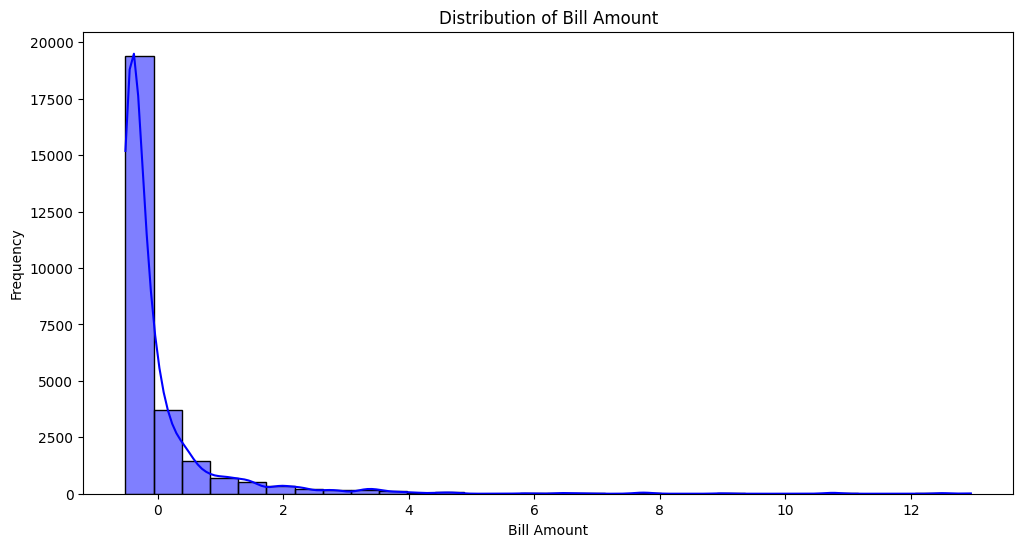

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of key variables
plt.figure(figsize=(12, 6))
sns.histplot(data=working_data_scaled['BILL_AMT'], bins=30, kde=True, color='blue')
plt.title('Distribution of Bill Amount')
plt.xlabel('Bill Amount')
plt.ylabel('Frequency')
plt.show()

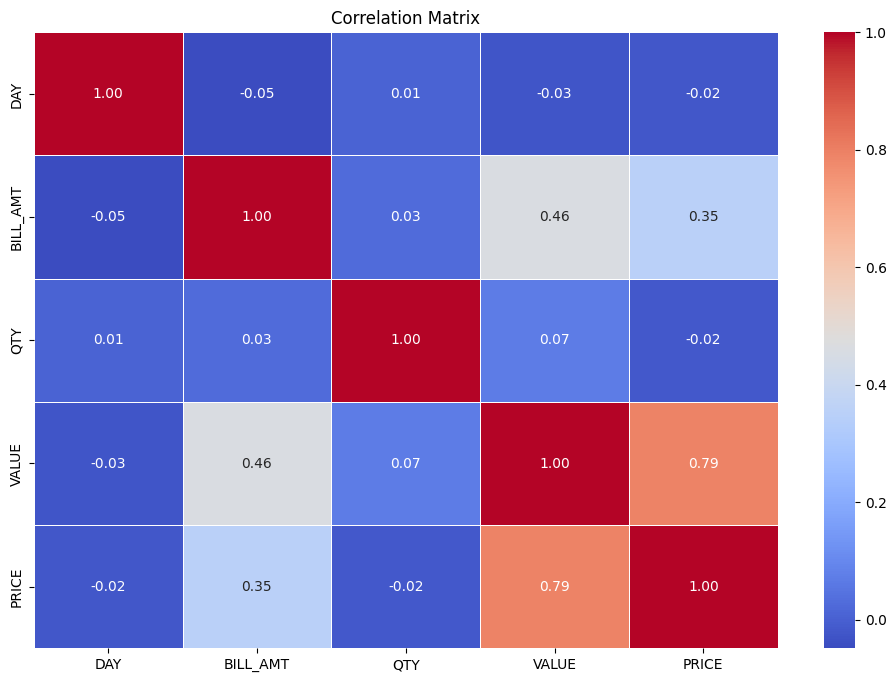

In [7]:
# Explore correlations between different variables
plt.figure(figsize=(12, 8))
correlation_matrix = working_data_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


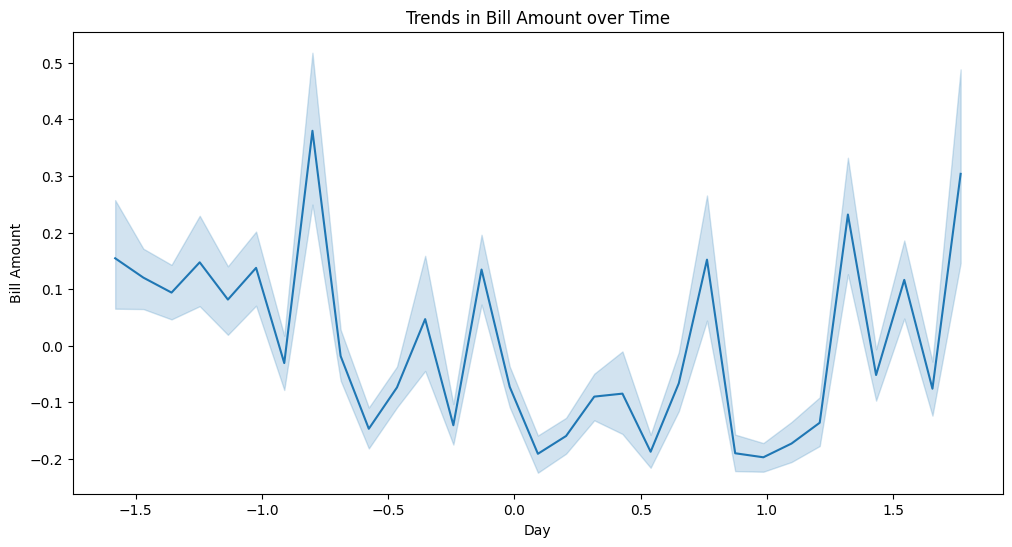

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=working_data_scaled, x='DAY', y='BILL_AMT')
plt.title('Trends in Bill Amount over Time')
plt.xlabel('Day')
plt.ylabel('Bill Amount')
plt.show()

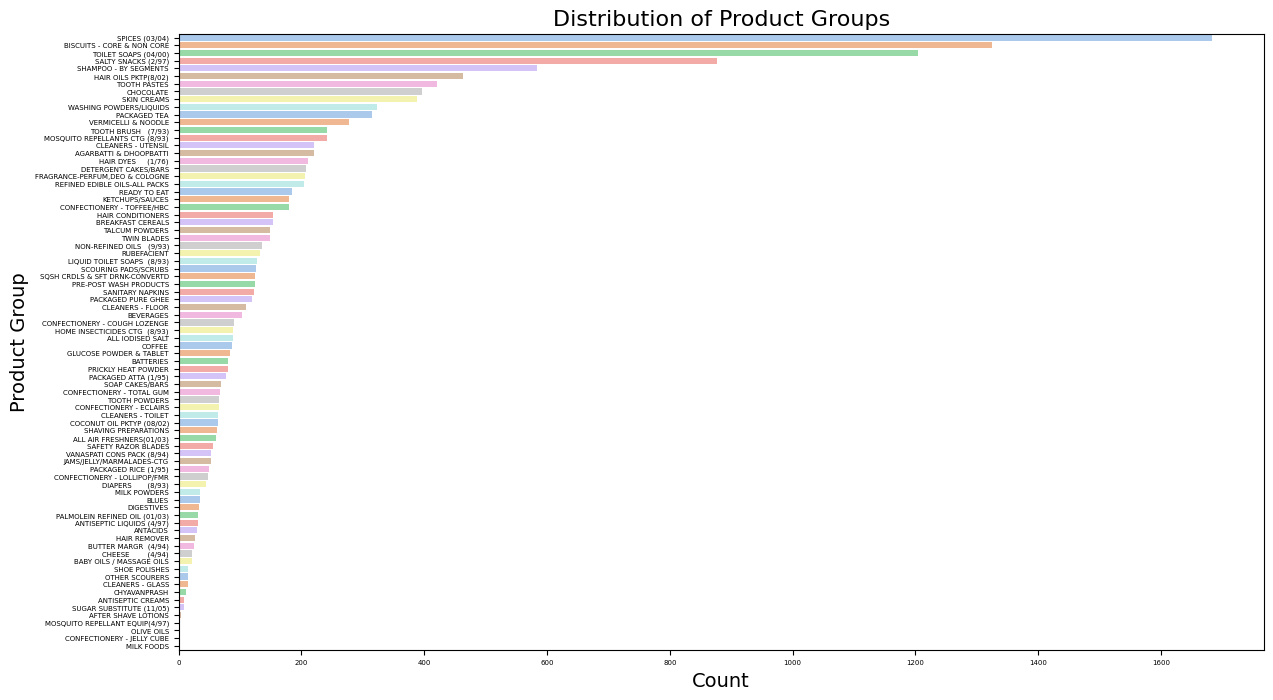

In [13]:
# Visualize the distribution of a categorical variable using a bar chart
plt.figure(figsize=(14, 8))  # Increase the size of the chart
sns.countplot(data=ideal_data, y='GRP', order=ideal_data['GRP'].value_counts().index, palette='pastel')
plt.title('Distribution of Product Groups', fontsize=16)  # Increase the title font size
plt.xlabel('Count', fontsize=14)  # Increase the x-axis label font size
plt.ylabel('Product Group', fontsize=14)  # Increase the y-axis label font size
plt.xticks(fontsize=5)  # Decrease the tick label font size
plt.yticks(fontsize=5)  # Decrease the tick label font size
plt.show()


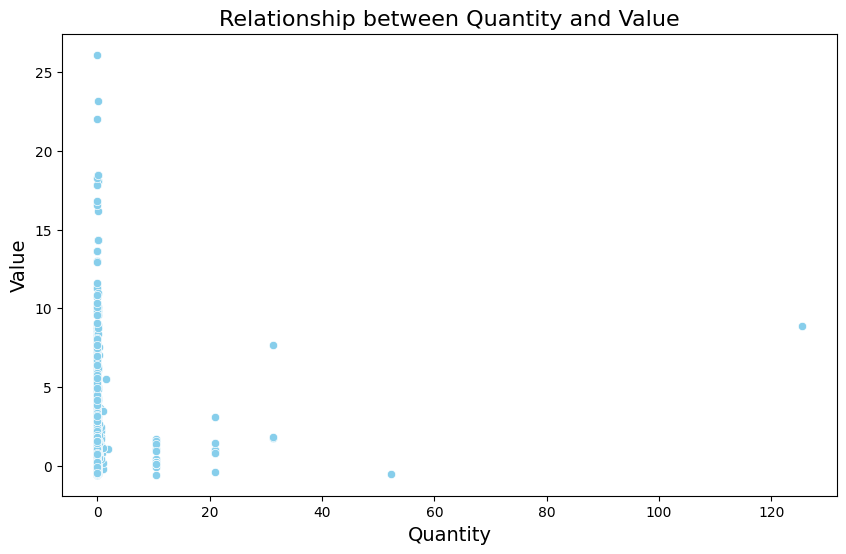

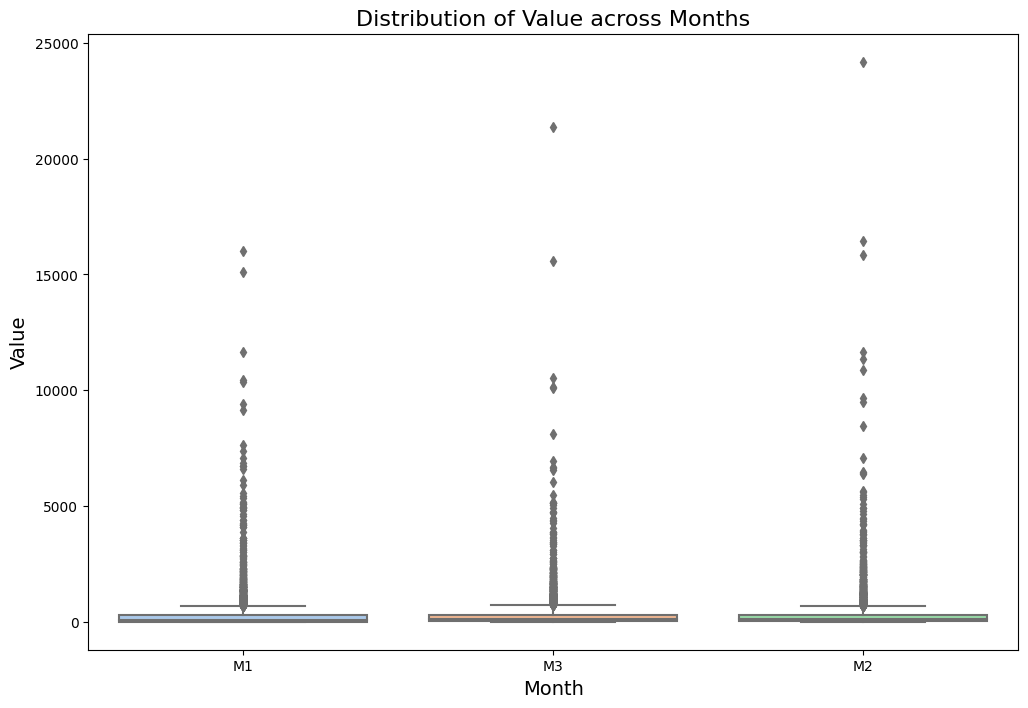

In [14]:
# Scatter plot to explore the relationship between two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=working_data_scaled, x='QTY', y='VALUE', color='skyblue')
plt.title('Relationship between Quantity and Value', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.show()

# Box plot to visualize the distribution of a numerical variable across different categories
plt.figure(figsize=(12, 8))
sns.boxplot(data=ideal_data, x='MONTH', y='VALUE', palette='pastel')
plt.title('Distribution of Value across Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.show()


In [22]:
working_data_scaled.head()

,DAY,BILL_AMT,QTY,VALUE,PRICE
0,-1.246891,-0.099290,-0.032457,1.332088,2.026060
1,-1.246891,-0.339413,-0.032457,0.230429,0.496399
2,-1.246891,-0.496417,-0.032457,-0.489887,-0.503764
3,-1.246891,-0.315401,-0.032457,0.340595,0.649365
4,-1.246891,-0.479793,-0.032457,-0.413618,-0.397865


In [23]:
working_data_scaled.columns

Index(['DAY', 'BILL_AMT', 'QTY', 'VALUE', 'PRICE'], dtype='object')

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten

# Assuming you have loaded the scaled data into a DataFrame named 'working_data_scaled'

# Assuming the target variable is stored in the 'PRICE' column of your DataFrame
target_variable = working_data_scaled['PRICE']

# Splitting the data into features (X) and target variable (y)
X = working_data_scaled.drop(columns=['PRICE'])  # Exclude target variable from features
y = target_variable

# Reshape X for Conv1D input
X_cnn = X.values.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42)

# Define and compile the models
gru_model = Sequential([
    GRU(units=64, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])
gru_model.compile(optimizer='adam', loss='mse')

lstm_model = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])
lstm_model.compile(optimizer='adam', loss='mse')

cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(units=1)
])
cnn_model.compile(optimizer='adam', loss='mse')

# Train the models
gru_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
cnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the models
gru_loss = gru_model.evaluate(X_test, y_test)
lstm_loss = lstm_model.evaluate(X_test, y_test)
cnn_loss = cnn_model.evaluate(X_test, y_test)

# Print the evaluation results
print("GRU Model Loss:", gru_loss)
print("LSTM Model Loss:", lstm_loss)
print("CNN Model Loss:", cnn_loss)


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.7533 - val_loss: 0.2605
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4264 - val_loss: 0.2476
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3124 - val_loss: 0.2441
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2685 - val_loss: 0.2404
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2531 - val_loss: 0.2341
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4080 - val_loss: 0.2251
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2822 - val_loss: 0.2249
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3236 - val_loss: 0.2146
Epoch 9/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2912 - val_loss: 0.2009
Epoch 10/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2642 - val_loss: 0.1917
Epoch 11/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2554 - val_loss: 0.1857
Epoch 12/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.

# **Model Training:**

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = working_data_scaled.drop(columns=['PRICE'])  # Excluding the target variable
y = working_data_scaled['PRICE']

# Split the data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

gru_model = Sequential([
    GRU(units=64, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
gru_history = gru_model.fit(X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1)), 
                            y_train.values,
                            epochs=10,
                            batch_size=32,
                            validation_data=(X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1)), y_val.values))
test_loss = gru_model.evaluate(X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test.values)
print("GRU Model Test Loss:", test_loss)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4744 - val_loss: 0.2697
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2744 - val_loss: 0.2740
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3057 - val_loss: 0.2828
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3295 - val_loss: 0.2497
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2551 - val_loss: 0.2536
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2923 - val_loss: 0.2470
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2793 - val_loss: 0.2338
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2582 - val_loss: 0.2266
Epoch 9/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2066 - val_loss: 0.2070
Epoch 10/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2748 - val_loss: 0.1805
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2786
GRU Model Test Loss: 0.19897007942199707


127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


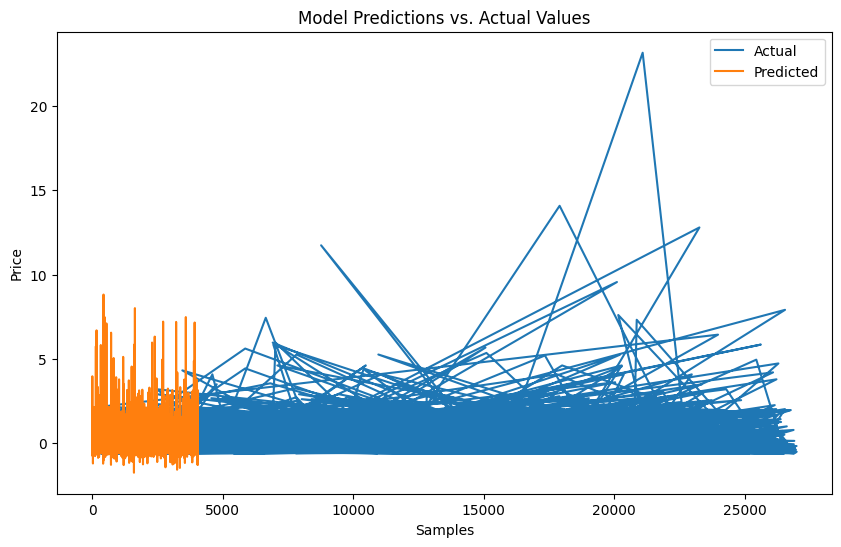

In [28]:
y_pred = gru_model.predict(X_test)
y_true = y_test

# Visualize Model Outputs

plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Model Predictions vs. Actual Values')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()

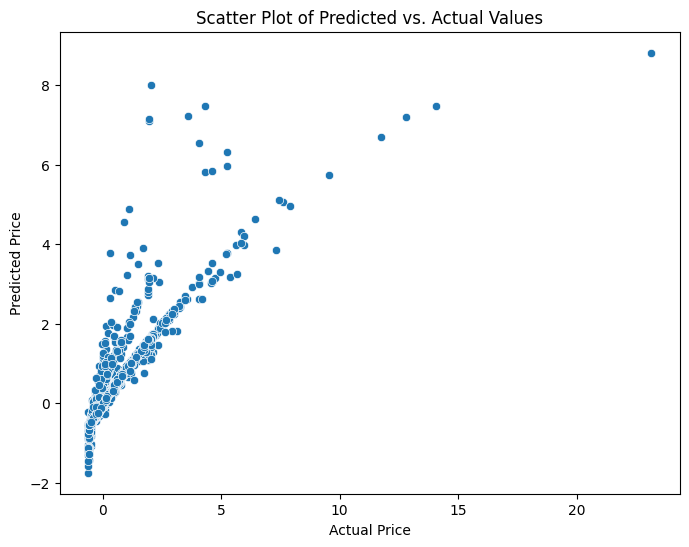

In [30]:
# Example: Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true.values.flatten(), y=y_pred.flatten())
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [31]:
#  Extract Actionable Insights
# Derive actionable insights from the model predictions
# Example: Calculate the mean absolute error (MAE) to evaluate model performance
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.14172595121542914


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


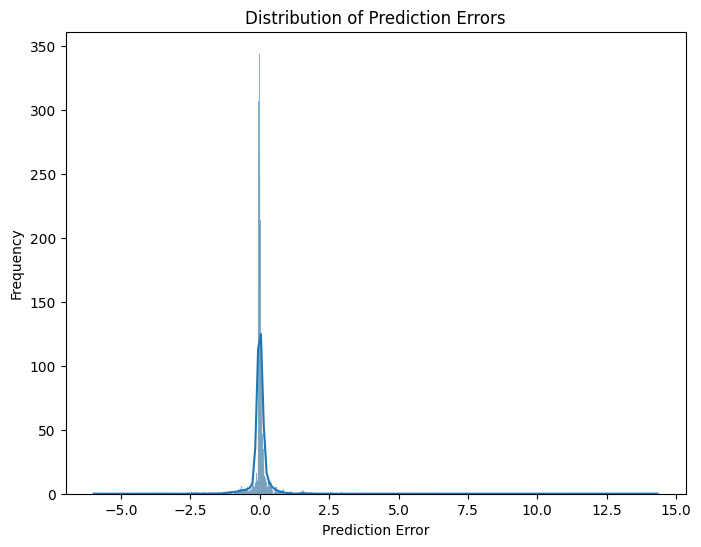

In [33]:
#  Identify Areas for Improvement
# Evaluate model performance and identify areas for improvement
# Example: Plot the distribution of prediction errors
errors = (y_true.squeeze() - y_pred.squeeze())
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


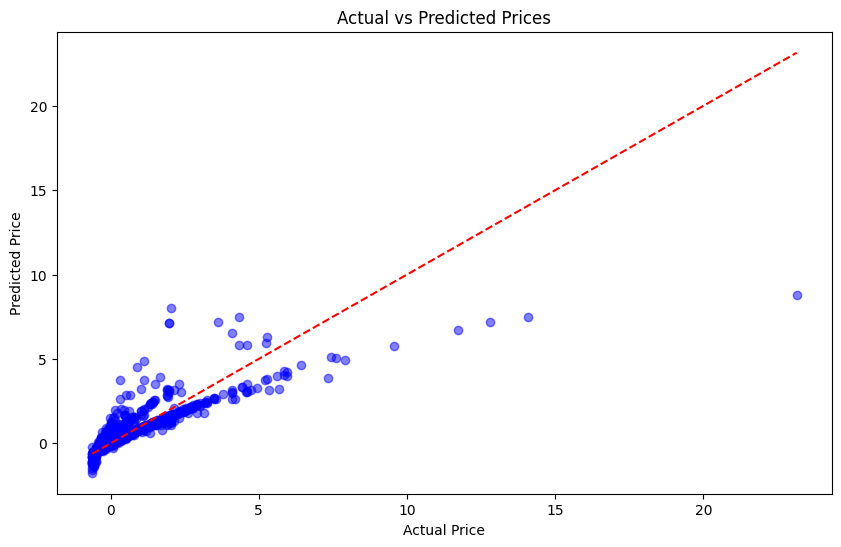

In [34]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Plotting the diagonal line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


In [35]:
working_data_scaled.head()

,DAY,BILL_AMT,QTY,VALUE,PRICE
0,-1.246891,-0.099290,-0.032457,1.332088,2.026060
1,-1.246891,-0.339413,-0.032457,0.230429,0.496399
2,-1.246891,-0.496417,-0.032457,-0.489887,-0.503764
3,-1.246891,-0.315401,-0.032457,0.340595,0.649365
4,-1.246891,-0.479793,-0.032457,-0.413618,-0.397865


844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Root Mean Squared Error (RMSE): 0.4429612206144746


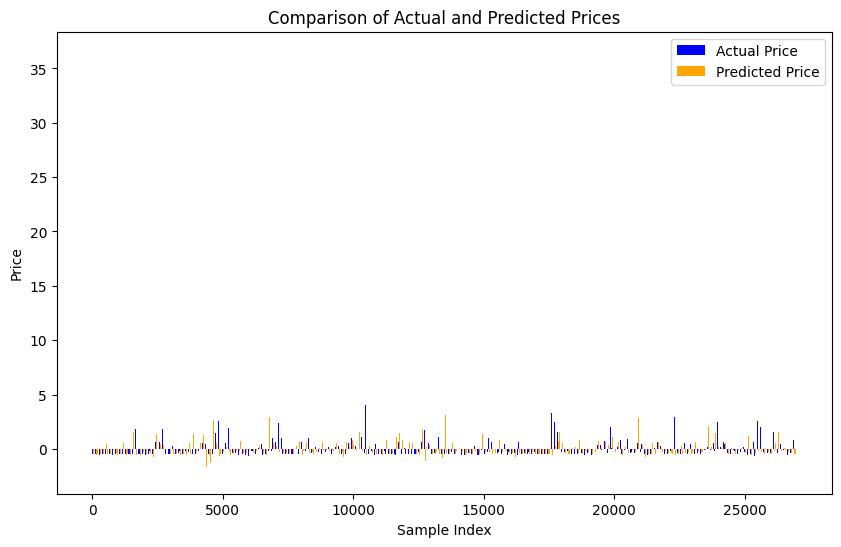

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Assuming 'working_data_scaled' contains your scaled dataset
df = working_data_scaled

# Assume 'X' contains the features used for prediction
X = df.drop(columns=['PRICE'])  # Exclude the target variable
y_true = df['PRICE']  # Actual prices from the dataset

# Load the trained model
model = gru_model # Replace 'your_model.h5' with the path to your trained model file

# Use the model to make predictions
y_pred = model.predict(X)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.figure(figsize=(10, 6))
bar_width = 0.35  # Define the bar width
plt.bar(np.arange(len(y_true)), y_true, width=bar_width, label='Actual Price', color='blue')
plt.bar(np.arange(len(y_pred)) + bar_width, y_pred.flatten(), width=bar_width, label='Predicted Price', color='orange')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Comparison of Actual and Predicted Prices')
plt.legend()
plt.show()


In [42]:
validation_data_file = "/kaggle/input/store-transaction-data/Hackathon_Validation_Data.csv"
validate_df=pd.read_csv(validation_data_file)
validate_df.head()

,ID,STORECODE,MONTH,GRP
0,1112535,N1,M1,AFTER SHAVE LOTIONS
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03)
3,1112547,N1,M1,ALL IODISED SALT
4,1112551,N1,M1,ANTACIDS


In [44]:
df=working_data_scaled
X = df.drop(columns=['PRICE'])  # Exclude the target variable
y_true = df['PRICE']  # Actual prices from the dataset
y_pred = gru_model.predict(X)
print("Shape of y_pred:", y_pred.shape)

844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of y_pred: (26985, 1)


In [47]:
# Check the shape of validate_df['ID']
print("Shape of ID column:", validate_df['ID'].shape)

# Check the shape of y_pred
print("Shape of y_pred:", y_pred.shape)


Shape of ID column: (2430,)
Shape of y_pred: (26985, 1)


In [52]:
# Filter y_pred based on the length of validate_df['ID']
y_pred_filtered = y_pred[:len(validate_df['ID'])]

# Convert predictions to integers and ensure non-negativity
y_pred_int = np.round(y_pred_filtered).astype(int)
y_pred_int[y_pred_int < 0] = 0

# Create the DataFrame for submission
submission_df = pd.DataFrame({'ID': validate_df['ID'], 'TOTALVALUE': y_pred_int.flatten()})


In [53]:
submission_df.head()

,ID,TOTALVALUE
0,1112535,2
1,1112539,0
2,1112543,0
3,1112547,1
4,1112551,0


In [55]:
# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)
print("DONE!!")

DONE!!
